In [1]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [4]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input


REAL_IMAGES_DIR = '/content/gdrive/MyDrive/Colab Notebooks/training_real'
FAKE_IMAGES_DIR = '/content/gdrive/MyDrive/Colab Notebooks/training_fake'


def preprocess_dataset(image_directory, label):
    preprocessed_images = []
    labels = []

    for filename in os.listdir(image_directory):
        img_path = os.path.join(image_directory, filename)
        if os.path.isfile(img_path):
            preprocessed_img = preprocess_image(img_path)
            preprocessed_images.append(preprocessed_img)
            labels.append(label)

    if len(preprocessed_images) == 0:
        return None, None

    return np.vstack(preprocessed_images), np.array(labels)


real_images, real_labels = preprocess_dataset(REAL_IMAGES_DIR, label=0)  # Use 0 for real images


fake_images, fake_labels = preprocess_dataset(FAKE_IMAGES_DIR, label=1)  # Use 1 for fake images


if real_images is None or fake_images is None:
    print("No valid images found in one or both datasets.")
else:

    all_images = np.vstack((real_images, fake_images))
    all_labels = np.concatenate((real_labels, fake_labels))


    random_indices = np.random.permutation(all_images.shape[0])
    all_images = all_images[random_indices]
    all_labels = all_labels[random_indices]

    print("Data preprocessing successful.")


Data preprocessing successful.


Shape of images: (1805, 224, 224, 3)
Shape of labels: (1805,)
Unique labels: [0 1]


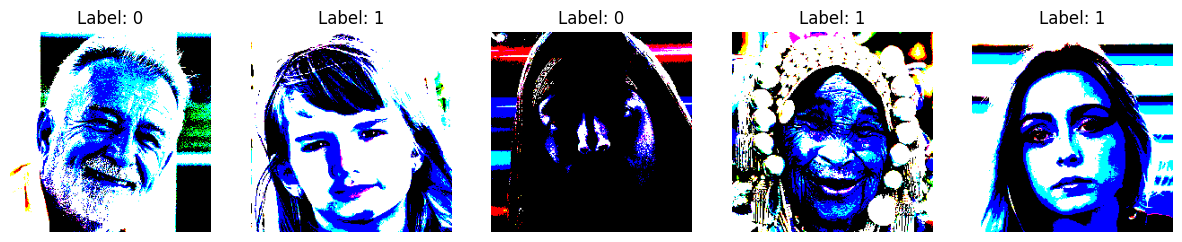

Real image count: 1081
Fake image count: 724
Epoch 1/5
40/40 [==============================] - 15s 350ms/step - loss: 1099.5221 - accuracy: 0.5558 - val_loss: 462.9442 - val_accuracy: 0.6162
Epoch 2/5
40/40 [==============================] - 11s 276ms/step - loss: 322.9604 - accuracy: 0.6089 - val_loss: 455.7138 - val_accuracy: 0.6310
Epoch 3/5
40/40 [==============================] - 9s 235ms/step - loss: 149.7678 - accuracy: 0.6168 - val_loss: 525.8790 - val_accuracy: 0.6052
Epoch 4/5
40/40 [==============================] - 9s 227ms/step - loss: 87.9591 - accuracy: 0.6295 - val_loss: 519.0974 - val_accuracy: 0.5609
Epoch 5/5
9/9 [==============================] - 0s 29ms/step - loss: 237.5999 - accuracy: 0.5720
Test Accuracy: 0.5719557404518127


In [5]:

print("Shape of images:", all_images.shape)
print("Shape of labels:", all_labels.shape)
print("Unique labels:", np.unique(all_labels))

import matplotlib.pyplot as plt

def display_samples(images, labels, num_samples=5):
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))
    for i in range(num_samples):
        axes[i].imshow(images[i])
        axes[i].set_title("Label: {}".format(labels[i]))
        axes[i].axis('off')
    plt.show()

sample_indices = np.random.randint(0, all_images.shape[0], 5)
display_samples(all_images[sample_indices], all_labels[sample_indices])

real_count = np.sum(all_labels == 0)
fake_count = np.sum(all_labels == 1)
print("Real image count:", real_count)
print("Fake image count:", fake_count)


from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(all_images, all_labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


dummy_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

dummy_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

dummy_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, batch_size=32)

test_loss, test_accuracy = dummy_model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)


In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(all_images, all_labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, batch_size=32)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)


58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/5
40/40 [==============================] - 1016s 25s/step - loss: 3.3761 - accuracy: 0.5914 - val_loss: 0.8522 - val_accuracy: 0.6347
Epoch 2/5
40/40 [==============================] - 982s 25s/step - loss: 0.6146 - accuracy: 0.6801 - val_loss: 0.8228 - val_accuracy: 0.6384
Epoch 3/5
40/40 [==============================] - 981s 25s/step - loss: 0.5357 - accuracy: 0.7134 - val_loss: 0.9803 - val_accuracy: 0.5720
Epoch 4/5
40/40 [==============================] - 981s 25s/step - loss: 0.4029 - accuracy: 0.7838 - val_loss: 0.8993 - val_accuracy: 0.6568
Epoch 5/5
9/9 [==============================] - 167s 18s/step - loss: 1.2888 - accuracy: 0.5461
Test Accuracy: 0.5461254715919495


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


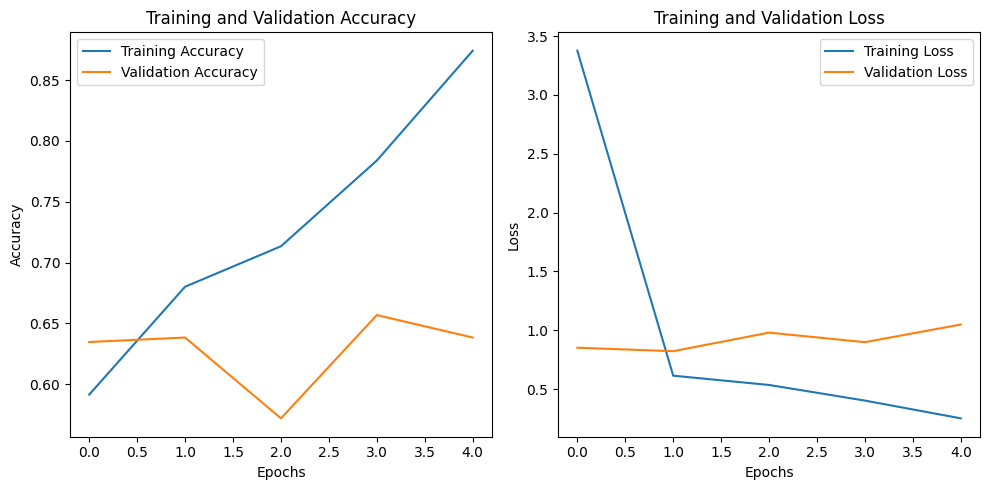

In [7]:
import matplotlib.pyplot as plt

model.save('/content/gdrive/MyDrive/fake_image_detection_model.h5')

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()


In [9]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

saved_model_path = '/content/gdrive/MyDrive/fake_image_detection_model.h5'
model = load_model(saved_model_path)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

def preprocess_single_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    preprocessed_img = preprocess_input(img_array)
    return preprocessed_img

new_image_path = '/content/gdrive/MyDrive/easy_1_1110.jpg'
preprocessed_new_image = preprocess_single_image(new_image_path)

predictions = model.predict(preprocessed_new_image)
predicted_class = "fake" if predictions > 0.5 else "real"
print("Predicted Class:", predicted_class)


9/9 [==============================] - 168s 18s/step - loss: 1.2888 - accuracy: 0.5461
Test Loss: 1.2888263463974
Test Accuracy: 0.5461254715919495
1/1 [==============================] - 1s 714ms/step
Predicted Class: fake


In [10]:
new_image_path = '/content/gdrive/MyDrive/real_00001.jpg'
preprocessed_new_image = preprocess_single_image(new_image_path)

predictions = model.predict(preprocessed_new_image)
predicted_class = "fake" if predictions > 0.5 else "real"
print("Predicted Class:", predicted_class)

1/1 [==============================] - 1s 945ms/step
Predicted Class: real
